In [1]:
import pandas as pd

In [2]:
file_path = 'solution.csv'
df = pd.read_csv(file_path)

In [3]:
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.cm as cm

def getColors(n):
    colormap = cm.viridis
    colors = [mcolors.rgb2hex(colormap(i/n)) for i in range(n)]
    return colors

unique_jobs = df['job'].unique()

conditions = [(df['job'] == job) for job in unique_jobs]

values = getColors(len(unique_jobs))

df['color'] = np.select(conditions, values)

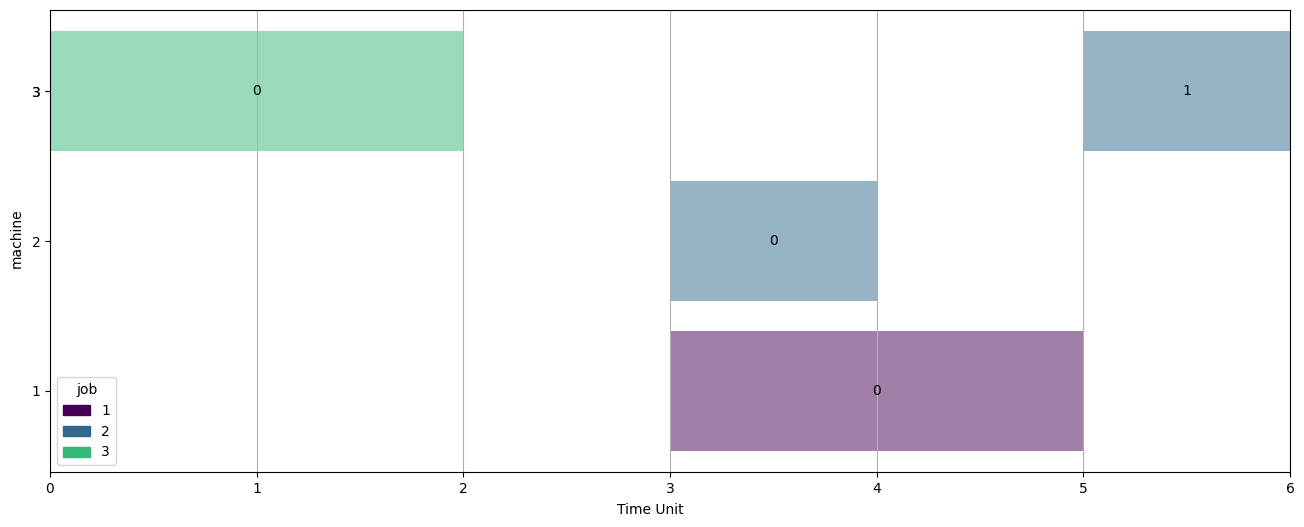

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

fig, ax = plt.subplots(figsize=(16,6))
axx = ax.barh(df['machine'], df['duration'], align='center', left=df['start_time'], color=df['color'], label=df['position'], linewidth=3, alpha=.5)

ax.set_xlim(0, df['end_time'].max())

fig.text(0.5, 0.04, 'Time Unit', ha='center')
fig.text(0.1, 0.5, 'machine', va='center', rotation='vertical')

handles = []
for job,color in zip(pd.unique(df['job']),pd.unique(df['color'])):
  handles.append(Patch(color=color, label=job))

plt.legend(handles=handles, title='job')

ax.set_yticks(df['machine'])
ax.bar_label(axx, df['position'], label_type='center')

plt.grid(axis = 'x')
plt.show()